## Task 1 -House Price Prediction :Machine Learning model to predict rice using linear regression only


## Importing Libraries

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

## Loading the Dataset

In [38]:
houseprice= pd.read_csv(r"C:\Users\Admin\Downloads\Bharat Intern\Machine learning\Housing.csv")
houseprice.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Data Preprocessing

## Drop any missing values

In [40]:
data.dropna(inplace=True)

## Convert categorical columns into numerical values using LabelEncoder

In [41]:
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == object:
        data[column] = le.fit_transform(data[column])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [42]:
# Including more features that are known to affect house prices
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'prefarea', 'furnishingstatus']]
y = data['price']

## Split the data into training and testing sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Define the ColumnTransformer with named transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']),
        ('cat', 'passthrough', ['prefarea', 'furnishingstatus'])  # Passthrough for categorical features
    ]
)

In [45]:
# Create the pipeline with the preprocessor and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## Fit the model on the training data

In [46]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat', 'passthrough',
                                                  ['prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluate the model

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2096049990291.3142
R^2 Score: 0.5853158848072445


## Now, you can use the trained model to predict house prices for new data

In [50]:
new_data = np.array([[2000, 3, 2, 1, 1, 0, 1]])  # New data: area=2000, bedrooms=3, bathrooms=2, stories=1, parking=1, prefarea=0, furnishingstatus=1
new_data_df = pd.DataFrame(new_data, columns=X.columns)  # Convert to DataFrame
predicted_price = model.predict(new_data_df)
print(f"Predicted Price for the new data: {predicted_price[0]}")

Predicted Price for the new data: 4282468.659295265


## Visualization

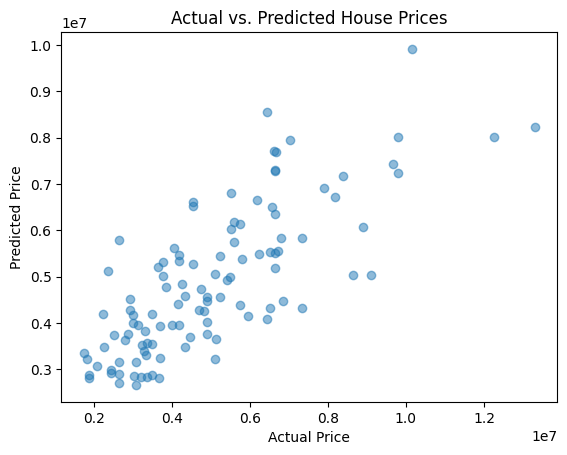

In [51]:
# Visualize actual vs. predicted house prices 
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()